In [1]:
from pathlib import Path

import torch
from PIL import Image
import pandas as pd

DATASET_PATH = Path('/Users/stple/Documents/Projects_Local/xray_interpreter/data')# / 'images_001'

image_paths = list((DATASET_PATH).rglob("*.png"))

In [28]:
print(f"Found {len(image_paths)} images.")

Found 112120 images.


In [29]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
labels = pd.read_csv(DATASET_PATH / 'Data_Entry_2017.csv')

labels = labels[["Image Index", "Finding Labels", "Patient ID"]]
labels['Labels'] = labels.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

mlb = MultiLabelBinarizer()
labels_matrix = mlb.fit_transform(labels['Labels'])
df_labels = pd.DataFrame(labels_matrix, columns=mlb.classes_, index=labels.index)
labels = pd.concat([labels, df_labels], axis=1)

labels = labels.drop(columns=['Finding Labels', 'Labels', 'No Finding'])

In [45]:
labels.describe()

,Patient ID,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,14346.381743,0.103095,0.024759,0.041625,0.020540,0.118775,0.022440,0.015037,0.002025,0.177435,0.051570,0.056466,0.030191,0.012763,0.047289
std,8403.876972,0.304084,0.155391,0.199732,0.141841,0.323524,0.148111,0.121702,0.044950,0.382038,0.221158,0.230821,0.171113,0.112251,0.212256
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7310.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13993.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20673.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30805.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
from sklearn.model_selection import train_test_split

# Get unique patient IDs
patient_ids = labels['Patient ID'].unique()

# Split patient IDs into training and testing sets
train_ids, test_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)

# Filter the labels dataframe based on the split
train_labels = labels[labels['Patient ID'].isin(train_ids)]
test_labels = labels[labels['Patient ID'].isin(test_ids)]

print("Train labels:", train_labels.shape)
print("Test labels:", test_labels.shape)

Train labels: (89826, 16)
Test labels: (22294, 16)


In [48]:
train_labels.describe()

,Patient ID,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
count,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000,89826.000000
mean,14290.180393,0.104112,0.024024,0.041369,0.020584,0.119832,0.022098,0.014717,0.001993,0.175862,0.052390,0.056231,0.030336,0.012658,0.047670
std,8401.086067,0.305408,0.153125,0.199143,0.141989,0.324766,0.147004,0.120420,0.044596,0.380705,0.222814,0.230368,0.171512,0.111793,0.213068
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7244.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13974.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20524.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30805.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
train_labels.to_csv('train.csv', index=False)
test_labels.to_csv('test.csv', index=False)

In [ ]:
split = 'train'

labels = pd.read_csv(f"{split}.csv", index_col=0).drop(columns=['Patient ID'])

# labels.info()

labels_dict = labels.apply(lambda row: row.tolist(), axis=1).to_dict()

tensor_list = []
for key in sorted(labels_dict.keys()):
    tensor_list.append(torch.tensor(labels_dict[key]))

all_labels = torch.stack(tensor_list)

# print(all_labels[0])


<class 'pandas.core.frame.DataFrame'>
Index: 89826 entries, 00000001_000.png to 00030805_000.png
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Atelectasis         89826 non-null  int64
 1   Cardiomegaly        89826 non-null  int64
 2   Consolidation       89826 non-null  int64
 3   Edema               89826 non-null  int64
 4   Effusion            89826 non-null  int64
 5   Emphysema           89826 non-null  int64
 6   Fibrosis            89826 non-null  int64
 7   Hernia              89826 non-null  int64
 8   Infiltration        89826 non-null  int64
 9   Mass                89826 non-null  int64
 10  Nodule              89826 non-null  int64
 11  Pleural_Thickening  89826 non-null  int64
 12  Pneumonia           89826 non-null  int64
 13  Pneumothorax        89826 non-null  int64
dtypes: int64(14)
memory usage: 10.3+ MB


In [19]:
from data import ImageDataset
import torchvision.transforms as T

transform = T.Compose([
        T.Resize(256),
        T.CenterCrop(240),
        T.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # EfficientNet's expectations
    ])

t = T.Compose([
        T.Lambda(lambda img: img.convert("RGB") if img.mode != "RGB" else img),
        T.ToTensor()
    ])

train_dataset = ImageDataset('train', False, transform=t)
# test_dataset = ImageDataset('test', False)

print(f"Train dataset size: {len(train_dataset)}")
# print(f"Test dataset size: {len(test_dataset)}")

# Load to dataloaders
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

for images, labels in train_loader:
    print(images.shape, labels.shape)
    print(images[0, 0:3, 0:3, 0:3])
    break

Train dataset size: 89826
torch.Size([32, 3, 1024, 1024]) torch.Size([32, 14])
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])


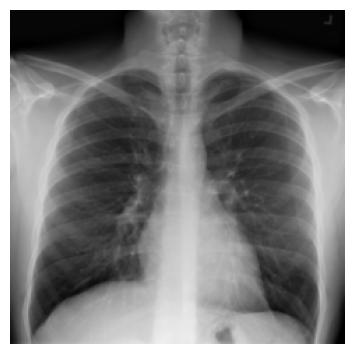

In [15]:
import matplotlib.pyplot as plt

def inv_transform(img_tensor):
    # Invert the normalization
    std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    inv_tensor = img_tensor * std + mean
    inv_tensor = torch.clamp(inv_tensor, 0, 1)
    return inv_tensor

# Get one batch from the train loader
images_batch, _ = next(iter(train_loader))

plt.figure(figsize=(25, 25))
for i in range(1):
    # Invert normalization
    img = inv_transform(images_batch[i])
    # Convert tensor from [C, H, W] to [H, W, C]
    img = img.permute(1, 2, 0).numpy()
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [22]:
import torch

channel_sum = torch.zeros(3)
channel_squared_sum = torch.zeros(3)
total_pixels = 0
total_images = 0

print("Starting image analysis...")

for i, (images, _) in enumerate(train_loader):
    bs, c, h, w = images.shape
    total_images += bs
    channel_sum += images.sum(dim=[0, 2, 3])
    channel_squared_sum += (images ** 2).sum(dim=[0, 2, 3])
    total_pixels += bs * h * w

    # Print progress after each batch:
    if (i + 1) % 30 == 0:
        print(f"Processed {total_images} images")

mean = channel_sum / total_pixels
std = torch.sqrt(channel_squared_sum / total_pixels - mean ** 2)

print("Image analysis complete.")
print("Total images analyzed:", total_images)
print("Channel means:", mean)
print("Channel std:", std)

Starting image analysis...
Processed 960 images
Processed 1920 images
Processed 2880 images
Processed 3840 images
Processed 4800 images
Processed 5760 images
Processed 6720 images
Processed 7680 images
Processed 8640 images
Processed 9600 images
Processed 10560 images
Processed 11520 images
Processed 12480 images
Processed 13440 images
Processed 14400 images
Processed 15360 images
Processed 16320 images
Processed 17280 images
Processed 18240 images
Processed 19200 images
Processed 20160 images
Processed 21120 images
Processed 22080 images
Processed 23040 images
Processed 24000 images
Processed 24960 images
Processed 25920 images
Processed 26880 images
Processed 27840 images
Processed 28800 images
Processed 29760 images
Processed 30720 images
Processed 31680 images
Processed 32640 images
Processed 33600 images
Processed 34560 images
Processed 35520 images
Processed 36480 images
Processed 37440 images
Processed 38400 images
Processed 39360 images
Processed 40320 images
Processed 41280 im